<a href="https://colab.research.google.com/github/mpHarm88/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Mikio_Harman_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def mvs(x):
  mean = sum(x)/(len(x))
  list = []
  n = len(x)
  
# subtracting the sample mean from the sample and squaring
  for i in x:
    j = (i-mean)**2
    list.append(j)

  sum_list = sum(list)
  variance = sum_list/(n)
  std_dev = np.sqrt(sum_list/(n))
  opp_std_dev = -1*(std_dev)

  return mean, variance, std_dev, opp_std_dev

print(mvs(sales))
print()
print(np.mean(sales))
print(np.var(sales))
print(np.std(sales))

(3052.714285714286, 183761.06122448976, 428.67360686714756, -428.67360686714756)

3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]
df = pd.DataFrame({'sales' : [3505, 2400, 3027, 2798, 3700, 3250, 2689],
                  'customers' : [127, 80, 105, 92, 120, 115, 93]})

df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [0]:
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
def corr_coeff(var, std):
  return var/(std*std)

print('Customers', mvs(customers))
print('Sales', mvs(sales))
print()
print('Correlation Coefficient',corr_coeff(249.3877551020408,15.792015549069118))
print()
df.corr()

Customers (104.57142857142857, 249.3877551020408, 15.792015549069118, -15.792015549069118)
Sales (3052.714285714286, 183761.06122448976, 428.67360686714756, -428.67360686714756)

Correlation Coefficient 1.0



,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
ship = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
ship.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [0]:
ship2 = ship[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']]
ship2 = ship2.fillna( method='ffill')

In [0]:
ship2.isnull().sum()

pclass      0
survived    0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [0]:
ship2.cov()

,pclass,survived,age,sibsp,parch,fare
pclass,0.701812,-0.127357,-3.951584,0.052781,0.013070,-24.218042
survived,-0.127357,0.236181,-0.314103,-0.013932,0.034861,6.151406
age,-3.951584,-0.314103,165.850021,-2.557851,-1.458263,113.651280
sibsp,0.052781,-0.013932,-2.557851,1.084413,0.336722,8.647858
parch,0.013070,0.034861,-1.458263,0.336722,0.748735,9.927754
fare,-24.218042,6.151406,113.651280,8.647858,9.927754,2675.845648


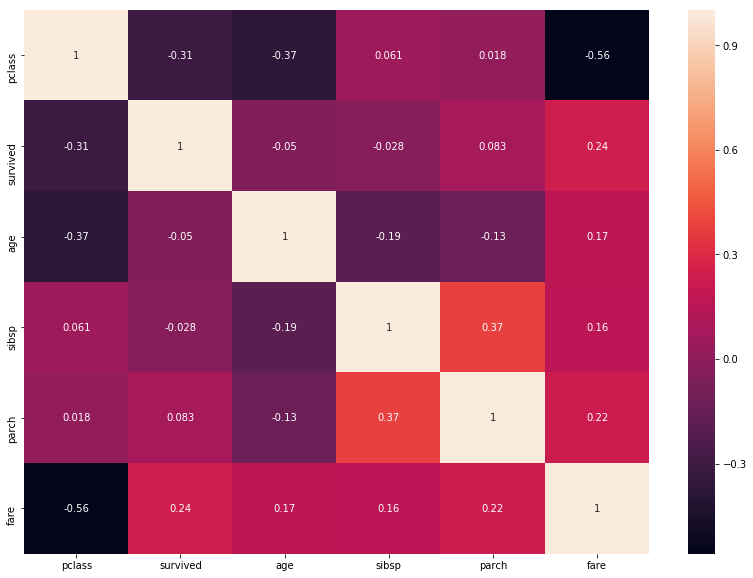

In [0]:
plt.figure(figsize=(14,10))
sns.heatmap(ship2.corr(), annot=True)


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

###A synonym for orthogonal is perpendicular.

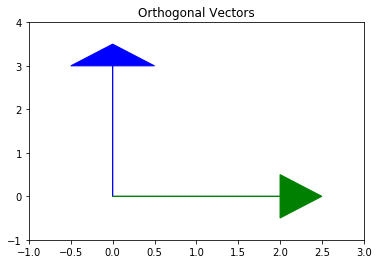

In [0]:
v = [0, 3]
v2 = [8, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], v[1],head_width=1, head_length=0.5, color ='blue')
plt.arrow(0,0, vector_2[0], v2[1],head_width=1, head_length=0.5, color ='green')
plt.xlim(-1,3)          
plt.ylim(-1,4)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [2]:
a = np.array([-5, 3, 7])
b = np.array([6,-8,2])

#calculating dot product
(a*b).sum()

-40

Vectors a and b are not orthogonal because their dot product do not equal zero.


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [6]:
c = np.array([2, -15, 6, 20])

print(np.linalg.norm(c)**2)
print((c*c).sum())
print(np.matmul(c.T, c))

665.0
665
665


All 3 values have the same result.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}





In [8]:
d = np.array([7,12])
e = np.array([2,11,-8])

print(np.linalg.norm(d))
print(np.linalg.norm(e))

13.892443989449804
13.74772708486752


## Unit Vectors

\begin{align}
d = \begin{bmatrix} 0.50 \\ 0.863 \end{bmatrix}
\qquad
e = \begin{bmatrix} 0.15 \\ 0.8 \\ -0.58  \end{bmatrix}
\end{align}

##Linear Combinations
##d=
\begin{align}
\hat{i} = \begin{bmatrix} 0.50 \\ 0 \end{bmatrix}
, \qquad 
\hat{j} = \begin{bmatrix} 0 \\ 0.863  \end{bmatrix}
\end{align}


##e=
\begin{align} 
\hat{i} = \begin{bmatrix} 0.50 \\ 0\\ 0 \end{bmatrix}
, \qquad
\hat{j} = \begin{bmatrix} 0 \\ 0.8 \\ 0  \end{bmatrix}
, \qquad
\hat{k} = \begin{bmatrix} 0 \\ 0 \\ -0.58  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [15]:
f = np.array([4, 12, 11, 9, 2])
norm = np.linalg.norm(f)

f_unit = []
for i in f:
  j = i/norm
  f_unit.append(j)

np_f_unit = np.array([f_unit])
print(np_f_unit)

[[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

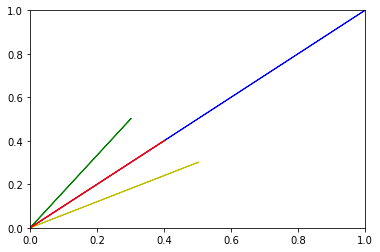

In [33]:
#Linearly Independent
plt.arrow(0,0,.5,.3, color='y')
plt.arrow(0,0,.3,.5, color='g')

#Linearly Dependent
plt.arrow(0,0,.4*5, .4*5, color='b')
plt.arrow(0,0,.4,.4, color='r')

plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

### Span = $\mathbb{R}^1$

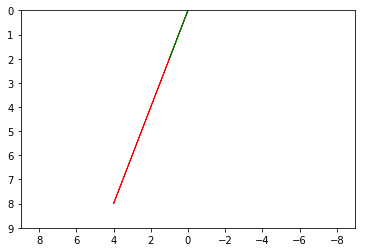

In [40]:
plt.xlim(9,-9)
plt.ylim(9,0)
plt.arrow(0,0,4,8, color='r')
plt.arrow(0,0,1,2, color='g')

plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [45]:
l = np.array([1,2,3])
m = np.array([-1, 0,7])
n = np.array([4,8,2])

np.linalg.matrix_rank([l,m,n])

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



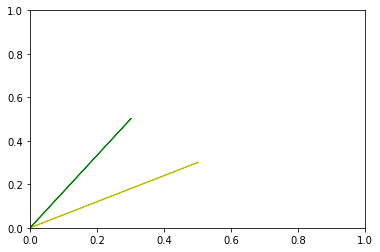

In [47]:
plt.arrow(0,0,.5,.3, color='y')
plt.arrow(0,0,.3,.5, color='g')
plt.show()

## 6.2 What does it mean to form a basis?

Forming a basis for a particular span means the vector or vectors can create any vector in its desired span. 

R1 = 1 independent vectors
R2 = 2 independent vectors
R3 = 3 independent vectors

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [50]:
p = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])

np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

This rank tells us that the matrix has a span of $\mathbb{R}^3$


# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

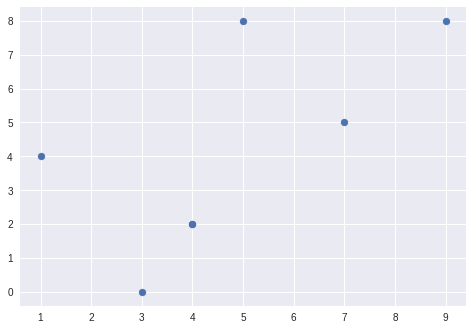

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()